<a href="https://colab.research.google.com/github/Endyrmion/MachineLearning/blob/master/TeslaStocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tesla stock prices predictions

Training Data 2010 à 2016
Test Data  2016 à 2018

In [2]:
# libraries & Keras Sequential, Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential # model adapté 1 input output tensor
from keras.layers import Dense # Dense Layer couche classique complétement connecté avec la couche précedente et la  suitvante
from keras.layers import LSTM
from keras.layers import Dropout


In [3]:
# importing the training set
dataset_train = pd.read_csv('Tesla.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [21]:
print(training_set[1])

[25.790001]


Feature Scaling

In [4]:
#feature scaling pour remove les biais(dif trop importantes entres les valeurs)
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [28]:
print(training_set_scaled[1])

[0.03553936]


In [34]:
X_train = []
y_train = []
for i in range(60, 1388):
  X_train.append(training_set_scaled[i-60:i, 0]) #  "open value"
  y_train.append(training_set_scaled[i, 0])
  #0-59 > 60?
  #1-60 > 61?
  #...
#conversion numpy array pour pouvoir reshape
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
print(y_train[600])

0.08216403656945268


In [6]:
#init
regressor = Sequential()

In [7]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(Dense(units = 1))

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') #adam good with optimisé pour le big data, mean squared value pour l'erreur

In [13]:
print(len(X_train))
print(len(y_train))

1328
1328


In [14]:
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
42/42 [==============================] - 11s 105ms/step - loss: 0.0643
Epoch 2/30
42/42 [==============================] - 5s 112ms/step - loss: 0.0058
Epoch 3/30
42/42 [==============================] - 5s 111ms/step - loss: 0.0060
Epoch 4/30
42/42 [==============================] - 5s 117ms/step - loss: 0.0050
Epoch 5/30
42/42 [==============================] - 5s 122ms/step - loss: 0.0045
Epoch 6/30
42/42 [==============================] - 5s 114ms/step - loss: 0.0050
Epoch 7/30
42/42 [==============================] - 5s 111ms/step - loss: 0.0043
Epoch 8/30
42/42 [==============================] - 5s 111ms/step - loss: 0.0044
Epoch 9/30
42/42 [==============================] - 5s 113ms/step - loss: 0.0044
Epoch 10/30
42/42 [==============================] - 5s 114ms/step - loss: 0.0039
Epoch 11/30
42/42 [==============================] - 5s 115ms/step - loss: 0.0034
Epoch 12/30
42/42 [==============================] - 5s 114ms/step - loss: 0.0034
Epoch 13/30
42/42 [=====

In [15]:
# the real stock price of 2016 - 2018
dataset_test = pd.read_csv('Tesla_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
# prédict
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
print(inputs)
X_test = []
for i in range(60, 364):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

[[0.81202812]
 [0.78790554]
 [0.75420758]
 [0.76179426]
 [0.72603392]
 [0.75325006]
 [0.73763482]
 [0.76197836]
 [0.77472099]
 [0.77921405]
 [0.72128308]
 [0.71969944]
 [0.7323684 ]
 [0.71903656]
 [0.73177913]
 [0.71877873]
 [0.72039919]
 [0.71542734]
 [0.70997676]
 [0.72813316]
 [0.77656241]
 [0.78974696]
 [0.79018888]
 [0.7986226 ]
 [0.76359882]
 [0.74256986]
 [0.7428645 ]
 [0.72481858]
 [0.69955433]
 [0.73310495]
 [0.73052698]
 [0.75277127]
 [0.76363568]
 [0.74102308]
 [0.73373103]
 [0.75571755]
 [0.79151471]
 [0.79420316]
 [0.79151471]
 [0.81339075]
 [0.80779282]
 [0.79667071]
 [0.77914038]
 [0.77847749]
 [0.77545754]
 [0.76812874]
 [0.77008064]
 [0.74161229]
 [0.75748535]
 [0.75851654]
 [0.80212128]
 [0.7982543 ]
 [0.79383491]
 [0.80598827]
 [0.79563946]
 [0.78967329]
 [0.79309835]
 [0.78783187]
 [0.81191764]
 [0.81895181]
 [0.79026255]
 [0.7742054 ]
 [0.75078257]
 [0.72938531]
 [0.74290131]
 [0.72872237]
 [0.71984678]
 [0.7213567 ]
 [0.68526497]
 [0.67333257]
 [0.7092034 ]
 [0.67

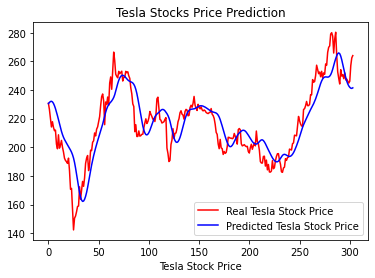

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')

plt.title('Tesla Stocks Price Prediction')
plt.xlabel('Tesla Stock Price')
plt.legend()
plt.show()